<a href="https://colab.research.google.com/github/vickypandey07/Book-Recommendation-System/blob/main/Book_Recommendation_System_Vikram_Pandey_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. **The main objective is to create a book recommendation system for users.**

# **Dataset information**

The Book-Crossing dataset comprises 3 files.<br>
● **Users** :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● **Books** : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● **Ratings** :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# **Let's import libraries**

In [5]:
# Importing libraries

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# To supress the warning messages

import warnings
warnings.filterwarnings('ignore')


# **Loading users Data**

In [6]:
# Let's load Users data and create dataframe

users = pd.read_csv('/content/drive/MyDrive/data_set_book_recomend/Users.csv')

In [7]:
# Printing first five rows of users dataframe

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
#Printing last five rows of users dataframe

users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


### **Loading Books data.**

In [9]:
# Loading Books data

books = pd.read_csv('/content/drive/MyDrive/data_set_book_recomend/Books.csv')

In [10]:
# Printing first five rows of books dataframe

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
#Printing last five rows of books dataframe

books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


### **Loading Ratings data.**

In [12]:
# Ratings data

ratings = pd.read_csv('/content/drive/MyDrive/data_set_book_recomend/Ratings.csv')

In [13]:
# Printing first five rows of ratings dataframe

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
# Printing last five rows of ratings dataframe

ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


###**Dimension of dataset**

In [15]:
# Dataset dimension
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


## **Users Dataset(EDA)**




### **Let's find the %age of null values in users dataset** 

In [16]:
#defining function to find %age of null values

def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [17]:
#%age of null values in users dataset

missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


* **Age column has around 39% null values**

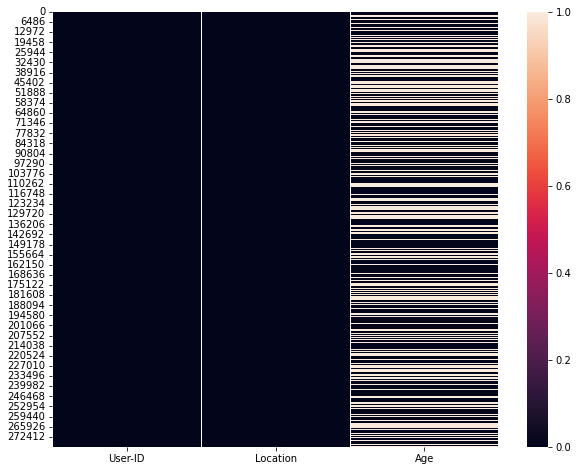

In [18]:
#plotting heat map of null values

fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(users.isna())
plt.show()

### **Let's check for outliers in Age column.**

Text(0.5, 1.0, 'Boxplot of Age column')

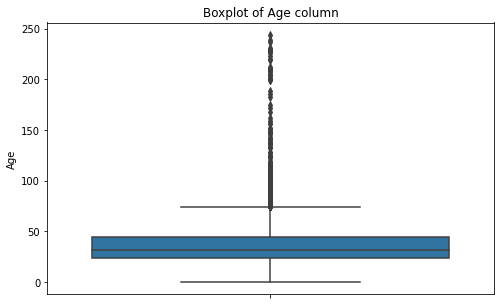

In [19]:
# Plotting boxplot for age column

plt.figure(figsize=(8,5))
sns.boxplot(y='Age', data=users)
plt.title('Boxplot of Age column')

In [20]:
#printing unique age values

print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

**Age : 244 <br>
there,we have Outlier data in Age**

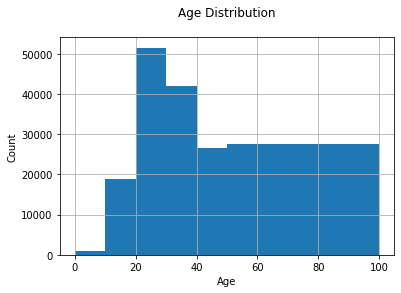

In [21]:
# Histplot showing distribution of age

users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* **Users of age group 20-30s are most active**

### **Let's find unique value in Location column**

In [22]:
# Printing unique values of location column

users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [23]:
#Number of unique values in location column

users['Location'].nunique()

57339

* **57339 unique Value it's really hard to understand<br>
So lets create column Country**

In [24]:
# Creating column Country

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [25]:
#printing number of unique values of country column

users.Country.nunique()

529

**Now we can drop location column from dataset.**

In [26]:
# dropping location column

users.drop('Location',axis=1,inplace=True)

In [27]:
#let's have a look at users dataset again

users.head()

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom


In [28]:
#Let's see datatypes of column

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   Country  278490 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [29]:
#Converting country column into string datatype

users['Country']=users['Country'].astype('str')

## **Books Dataset(EDA)**




**Let's have a look at books dataset again.**

In [30]:
# Printing rows using head of books dataset.

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


* **Given rows contains information about top 5 books like authors,year of publication etc.**



### **Here checking for  10 authors who had written the maximum number of books.**

Text(0.5, 1.0, 'Top 10 Authors')

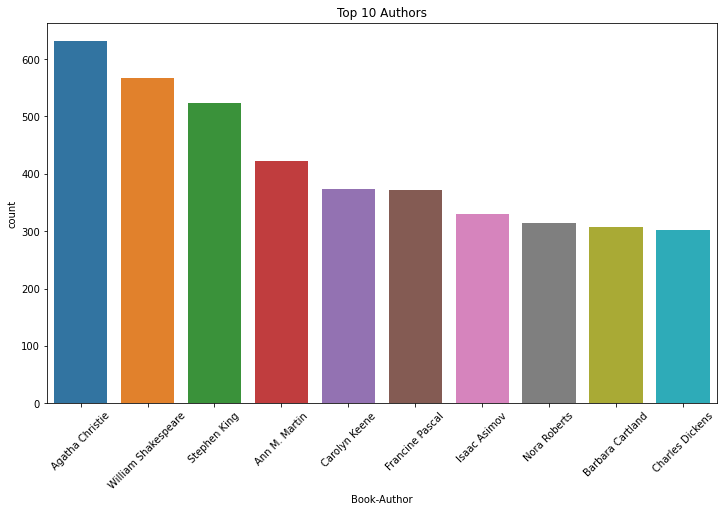

In [31]:
# Using barplot to show top 10 authors

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Authors')

* **It shows that, Agatha Christie had written maximum number of books followed by William Shakespeare and Stephen King.**

### **Now checking for top 10 publishers who have published maximum number of books.**

Text(0.5, 1.0, 'Top 10 Publishers')

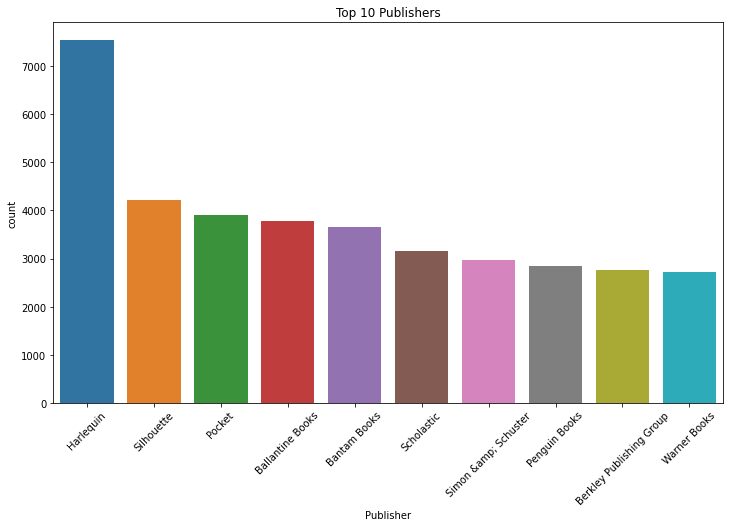

In [32]:
# Using barplot to show top 10 publishers.

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Publishers')

* **Maximum number of books had been published by Harleyquin.**

### **Let's look for Year-of-Publication column**

In [33]:
# Let's print unique values of location column

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

****
> * **Here Year-of-Publication column contains some name of publishers.**
> * **Some values are int and some values are string.**



In [34]:
# Therefore let's Convert all values into string

books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

### **Cleaning Year-of-Publication column**

In [35]:
# Let's check the rows having 'DK Publishing Inc' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


* **Here Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file.**

In [36]:
# As book Author is incorrectly loaded with Book Title, so let's correct them

#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [37]:
# Let's check the corrections

books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [38]:
# Let's investigate the rows having 'Gallimard' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [39]:
# Making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [40]:
# Let's check the corrections

books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


**Mistakes has been corrected in Year-of-Publication column.**

**let's convert all values of Year-of-Publication into integers.**

In [41]:
# Converting each values from string to integers

books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**Note:**


* **Years after 2006 are invalid as this dataset was published in 2004.**
* **The value 0 for Year-of-Publication doesn't make any sense.**
* **So, we are setting invalid years as NaN.**
* **Considering extreme value as 2006 just to keeping some margin in case dataset was updated thereafter.**

In [42]:
# Here Setting invalid years as NaN

books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [43]:
# Replacing NaNs with mean value of Year-Of-Publication

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

In [44]:

# Now checking the no. of null values in Books data

books.isnull().sum()


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

* **let's impute as Null values in Book-Author and Publisher columns.**



### **Book-Author column**

In [45]:
# Exploring 'Book-Author' column

books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [46]:

# Filling Nan of Book-Author with others

books['Book-Author'].fillna('other',inplace=True)


In [47]:
# Let's check for null values again

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

* **Finally, We imputed all null values and our Books dataset is clean now.**

# **Ratings dataset(EDA)**

In [48]:
# let's print rows using head method.

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [49]:
# Extracting ratings of only available books in books dataset

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

* **Many rows having book ISBN not part of books dataset, got dropped off.**

In [50]:
# Checking if ratings from users are eual to no. of users or not

print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


* **There were no new users in ratings dataset.**

### **Now Let's see the distribution of ratings**

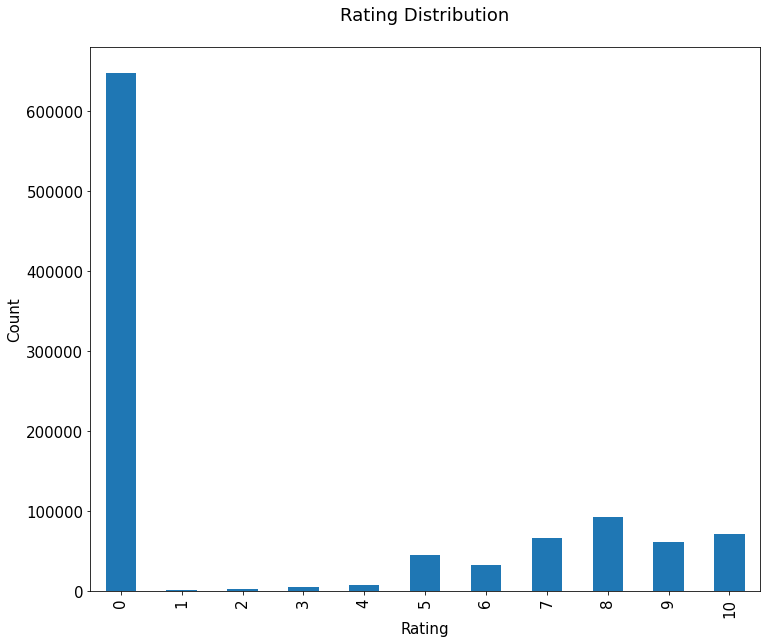

In [51]:
# Following is the distribution plot of ratings

plt.figure(figsize=(12,10))
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* **Ratings are very unevenly distributed, and the vast majority of ratings are 0.**
* **As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information.**
* **Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets.**

In [52]:
# Let's segregate implicit and explict ratings datasets

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

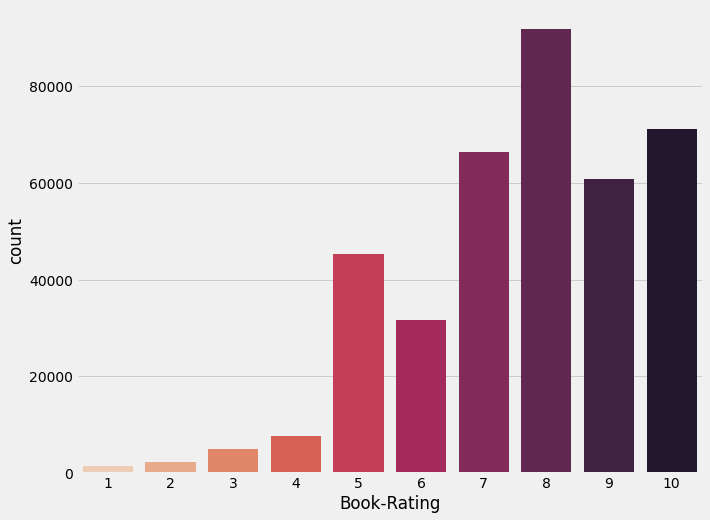

In [53]:
# Distribution of explicit ratings

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

* **It is found that the users rate higher ratings and rating 8 has been rated highest number of times.**

### **Checking for top 5 books which are rated by most number of users.**

In [54]:
# Top 5 most rated books

rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


* **The book with ISBN '0316666343' received the most rating counts.**

### **Let’s check name of this book and what books are in the top 5.**

In [55]:
# Names of top rated books

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


**considerable points:**
* **The title of most rated book is Alice Sebold’s “The Lovely Bones:A Novel”.** 
* **It is conclusive that novels are popular and likely receive more ratings.**

In [56]:
# Let's create column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,1
3,276729,052165615X,3,1
4,276729,0521795028,6,1
8,276744,038550120X,7,81
16,276747,0060517794,9,30


In [57]:
# Creating column Rating average 

ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')


In [58]:
# Creating column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated,Avg_Rating
1,276726,0155061224,5,1,5.000000
3,276729,052165615X,3,1,3.000000
4,276729,0521795028,6,1,6.000000
8,276744,038550120X,7,81,7.580247
16,276747,0060517794,9,30,8.000000


# **Now let's Merge all Datasets**

In [59]:
# Here merging all three datsets together

Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [60]:
# checking shape of Final_Dataset

Final_Dataset.shape

(383842, 14)

In [61]:
# Now checking percentage of null values in each column

print(100*(Final_Dataset.isnull().sum()/len(Final_Dataset.index)).sort_values(ascending=False))

Age                        29.757296
Publisher                   0.000521
Image-URL-L                 0.000261
Image-URL-M                 0.000000
Image-URL-S                 0.000000
Year-Of-Publication         0.000000
Book-Author                 0.000000
Book-Title                  0.000000
Avg_Rating                  0.000000
Total_No_Of_Users_Rated     0.000000
Book-Rating                 0.000000
ISBN                        0.000000
Country                     0.000000
User-ID                     0.000000
dtype: float64


* **Looks like, There are no null values in Final_Dataset.**

# **Popularity Based Filtering**

**Following is the Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.**

In [62]:
# Let's find the values of C and m.

C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504765 , m=64.0


(38570, 14)

In [63]:
# Weighted_rating function to find popular books.

def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [64]:
# Here, only one entry of each book

Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('seagreen',as_cmap=True)

In [65]:
# Sorting books based on score calculated above

Top_Books = Top_Books.sort_values('Score', ascending=False)

In [66]:
# Let's now print the top 10 popular books

Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(10).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


* **It is clear that the Popularity based recommender provide a general chart of recommended books to all the users.**


# **Collaborative Filtering Recommender**

## **Model Based Approach**

**The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.**

In [67]:
# Importing Libraries

import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [68]:
# Firstly let's rename columns of ratings_explicit dataframe

ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [69]:
# Now let's extract nummber of users with atleast 3 ratings

user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [70]:
# Extracting top 10% most frequently rated books

book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


### **SVD and NMF algorithms**

**Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction.**
**Surprise package provides implementation of these algorithms.**

In [71]:
# Installing surprise

!pip install surprise

     |████████████████████████████████| 11.8 MB 52 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619406 sha256=e37799e03c7674d43fe7ad3160025f505520c852ec37dfb285eebf8379ec142a
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [72]:
# Importing modules

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [73]:
# Taking copy of dataset first

df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [74]:
# Fitting SVD model

model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.602989
test_mae     1.239554
fit_time     7.719643
test_time    0.753803
dtype: float64

In [75]:
# Fitting NMF model

model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.622911
test_mae      2.239974
fit_time     13.163644
test_time     0.722615
dtype: float64

* **SVD gives better results in terms of accuracy and training/test time.**

### **Optimization of SVD**

**The hyperparameters of SVD:**
<br>
* **n_factors** - the number of factors<br>
* **n_epochs** - the number of iteration of the SGD procedure<br>
* **lr_all** - the learning rate for all parameters<br>
* **reg_all** - the regularization term for all parameters<br>

**In order to find optimal set of hyperparameters we use GridSearchCV**

In [77]:
# Initializing parameters dictionary for GridSearchCV

param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose=2, n_jobs=-1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.9min


1.5965630463316345
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.5min finished


### **Let's have analysis of SVD model results**

In [78]:
# Splitting train and test set and also fitting the model with hyperparameters obtained above

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [79]:
# Creating dataframe of results

df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
2885,172676,0066211247,8.0,7.833375,False,8.0,0.166625
20098,23699,0345339711,10.0,9.050637,False,9.0,0.949363
25452,219073,0310235138,8.0,7.735924,False,8.0,0.264076
6042,171445,0553209671,10.0,8.114285,False,8.0,1.885715
19376,196077,0380005239,9.0,7.488912,False,7.0,1.511088


### **The distribution of actual and predicted book ratings**

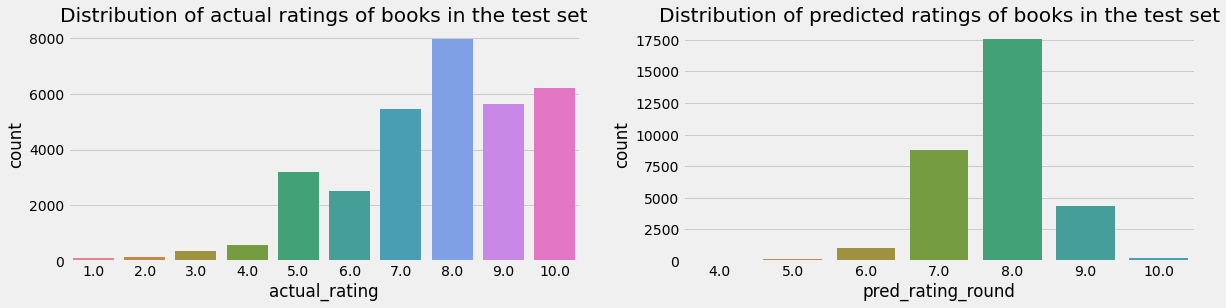

In [81]:
# Following is the distribution of actual and predicted book ratings

palette = sns.color_palette("husl", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

**According to the distribution of actual ratings of books in the test set:**
* **More users gave positive scores - between 7 and 10.**
* **Here mode equals 8.**
* **The distribution of predicted ratings in the test set is visibly different.**


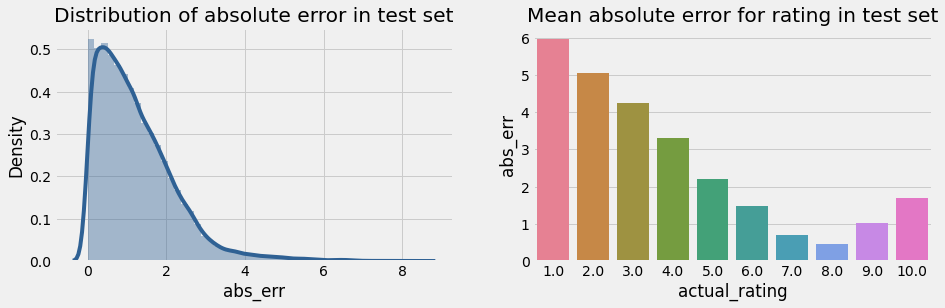

In [82]:
# Distribution of absolute error of predicted ratings

df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

* **The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1.**
* **There is a long tail that indicates that there are several observations for which the absolute error was close to 10.**

### **Now let's have analysis of predicted ratings of a particular user**

In [83]:
# Let's first make a copy of books dataset and merge on predicted dataframe

df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

**We select the user with ID 193458 to analyse ratings**

### **Train & Test set of  Top rated books**

In [84]:
# Printing top 10 rated books by user 193458

selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Total_No_Of_Users_Rated,Avg_Rating,book_title,pred_rating
113594,193458,1853260169,10,13,8.153846,Sense and Sensibility (Wordsworth Classics),NaN
113548,193458,014011369X,9,8,9.125000,"And the Band Played on: Politics, People, and ...",NaN
113543,193458,0064471063,9,27,8.518519,The Horse and His Boy,NaN
113541,193458,0064471047,9,42,8.714286,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
113549,193458,0140298479,9,113,7.539823,Bridget Jones: The Edge of Reason,NaN
113542,193458,0064471055,9,22,8.545455,Prince Caspian (rack) : The Return to Narnia (...,NaN
113545,193458,006447108X,9,18,8.833333,The Last Battle,NaN
113565,193458,0345431057,9,8,9.125000,Slaves in the Family (Ballantine Reader's Circle),NaN
113553,193458,0142001740,9,307,8.452769,The Secret Life of Bees,NaN
113585,193458,0679429220,9,107,7.794393,Midnight in the Garden of Good and Evil: A Sav...,NaN


In [85]:
# Printing prediction of top 5 rated books

df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Total_No_Of_Users_Rated,Avg_Rating,book_title,pred_rating
113547,193458,0064471101,9,37,8.729730,The Magician's Nephew (rack) (Narnia),8.438303
113551,193458,0140620125,9,15,8.133333,Wuthering Heights (Penguin Popular Classics),8.032958
113581,193458,0553258001,9,38,8.236842,The Cider House Rules,8.027274
113584,193458,0671880314,9,36,8.305556,Schindler's List,7.864368
113590,193458,0887308589,8,15,8.200000,The Dilbert Principle: A Cubicle's-Eye View of...,7.835859


### **Test set: Actual top rated books**

In [86]:
# Printing actual top 5 rated books by user 193458

df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Total_No_Of_Users_Rated,Avg_Rating,book_title,pred_rating
113592,193458,1853260002,10,23,8.217391,Pride &amp; Prejudice (Wordsworth Classics),7.692329
113547,193458,0064471101,9,37,8.729730,The Magician's Nephew (rack) (Narnia),8.438303
113551,193458,0140620125,9,15,8.133333,Wuthering Heights (Penguin Popular Classics),8.032958
113558,193458,0330352695,9,13,7.615385,Four Letters of Love,7.571430
113581,193458,0553258001,9,38,8.236842,The Cider House Rules,8.027274


**Following is the result after analyzing book ratings by the user - 193458:**
* **He/she likes English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List).**
* **Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.**

## **Memory Based Approach**

### **User-Item Based Filtering**

In [87]:
# Renaming columns of ratings_explicit dataframe

ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated,Avg_Rating
1,276726,0155061224,5,1,5.000000
3,276729,052165615X,3,1,3.000000
4,276729,0521795028,6,1,6.000000
8,276744,038550120X,7,81,7.580247
16,276747,0060517794,9,30,8.000000


In [88]:
# Printing number of users and number of users with atleast 5 interactions

users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Total Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('Number of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

Total Number of users: 68091
Number of users with at least 5 interactions: 449


In [89]:
# Printing no. of interactions and no. of interactions from users with at least 5 interactions

print('Total number of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

Total number of interactions: 383842
Number of interactions from users with at least 5 interactions: 103271


**Performing data scaling.**

In [90]:
# Appling log transform on Book-Rating

def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.169925
1,0001046438,23902,3.321928
2,000104687X,23902,2.807355
3,0001047213,23902,3.321928
4,0001047973,23902,3.321928


### **Train test split**

In [91]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [92]:
# Applying train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=12)

print('Number of interactions on Train set: %d' % len(interactions_train_df))
print('Number of interactions on Test set: %d' % len(interactions_test_df))

Number of interactions on Train set: 82616
Number of interactions on Test set: 20655


In [93]:
# Creating a sparse pivot table with users in rows and items in columns

users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,000104799X,0001048082,0001053736,0001053744,0001055607,0001845039,0001935968,0001944711,0001952803,0001953877,0002005018,0002005557,0002006588,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002197154,0002223929,0002228394,000223257X,0002233509,0002239183,0002244098,000225056X,0002250810,0002251485,0002251760,...,9813056096,9813056363,9813056495,9838120014,9838523283,9871106173,9871138148,9879397274,987960170X,9974643058,999058284X,9992003766,9992059958,9993584185,9994256963,9994348337,9997406567,9997406990,999740923X,9997409728,9997411757,9997411870,999750805X,9997508769,9997512952,9997519086,9997555635,B00001U0CP,B00005TZWI,B00006CRTE,B00006I4OX,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B00013AX9E,B0001I1KOG
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Creating array of values of users items pivot matrix df

users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
# Extracting users ids

users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

### **Now making factors of user-item matrix**

In [96]:
# The number of factors to factor the user-item matrix.

NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix

U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [97]:
# Shape of user-item matrix

users_items_pivot_matrix.shape

(449, 55871)

**Let's check the shapes of all three factors.**

In [98]:
U.shape

(449, 15)

In [99]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [100]:
Vt.shape

(15, 55871)

**After the factorization, let's try to reconstruct the original matrix by multiplying its factors.**

In [101]:
# Multiplying all factors

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 2.20023214e-02,  2.57725085e-03,  2.17802964e-03, ...,
         4.87568540e-03,  3.74540686e-04,  3.50305352e-04],
       [-6.26310846e-04, -8.10335760e-04, -6.84813162e-04, ...,
         1.39488603e-03,  8.42185861e-05,  6.52115886e-05],
       [ 3.88898390e-03, -2.14130350e-03, -1.80961139e-03, ...,
         3.75527311e-03,  2.48705392e-04,  1.98275421e-04],
       ...,
       [ 8.60649094e-03,  2.39017228e-03,  2.01992991e-03, ...,
         4.83774702e-03,  3.22942815e-04,  2.44342541e-04],
       [ 2.21385219e-02, -3.23817431e-03, -2.73657476e-03, ...,
         6.15094081e-03,  3.77342333e-04,  3.03756214e-04],
       [ 4.18416680e-03, -1.23619910e-03, -1.04470944e-03, ...,
         2.19297970e-03,  1.32878748e-04,  9.14059801e-05]])

In [102]:
# Following is the shape of resulting matrix

all_user_predicted_ratings.shape

(449, 55871)

* **The resulting matrix is not sparse any more.**
* **It generated predictions for items the user have not yet interaction, which we can use for recommendations.**

### **Let's convert the reconstructed matrix into a dataframe.**

In [110]:
# Converting the reconstructed matrix back to a Pandas dataframe

cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,8890,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,16966,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,...,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000913154,0.022002,-0.000626,0.003889,-0.000284,-0.001789,-0.004283,-0.003185,0.015454,0.026601,0.012810,-0.000848,0.011567,-0.005780,0.005928,-0.004601,-0.000030,0.015781,-0.001289,0.002667,0.008013,-0.001438,-0.006442,-0.016191,0.020700,-0.004352,0.008777,0.004959,0.030914,0.003841,0.014709,-0.004022,0.001117,-0.012257,-0.000458,0.010005,-0.005717,0.000087,0.004423,-0.006316,0.002441,...,0.016824,0.002968,0.002804,-0.001631,0.025025,-0.001321,0.014970,-0.001095,-0.011991,0.016320,0.001868,0.103136,0.009118,-0.002577,-0.001584,-0.000697,-0.009061,0.003695,0.000720,-0.004569,0.049701,-0.002730,-0.006439,0.017871,-0.004505,-0.000940,0.008690,0.001184,0.003650,0.007544,0.001208,0.002424,-0.006880,0.007237,-0.012514,-0.006683,0.009211,0.008606,0.022139,0.004184
0001046438,0.002577,-0.000810,-0.002141,0.024338,-0.000755,0.008329,0.015692,0.007082,-0.003995,0.008974,-0.000358,0.006179,-0.000675,0.012470,0.006545,0.000020,-0.003137,-0.001907,-0.001147,-0.003197,0.001994,0.010658,-0.002958,0.007878,0.004427,0.003546,0.010825,-0.001234,-0.004974,-0.000849,0.001221,-0.002433,0.010427,-0.004503,0.002976,3.310764,0.000793,-0.001072,-0.007321,-0.000748,...,-0.000399,-0.000362,0.002049,0.004028,0.018556,-0.004848,0.002367,0.004735,0.007285,-0.001662,0.003401,-0.014243,-0.000943,-0.000119,0.010489,0.002857,-0.000126,-0.000984,-0.000021,-0.003262,-0.000590,0.002888,-0.000820,-0.002721,-0.006817,0.004176,0.012362,-0.000439,-0.000591,0.006368,-0.003086,0.015101,-0.001532,0.024500,-0.006917,-0.009046,-0.000477,0.002390,-0.003238,-0.001236
000104687X,0.002178,-0.000685,-0.001810,0.020568,-0.000638,0.007039,0.013261,0.005985,-0.003376,0.007584,-0.000302,0.005222,-0.000570,0.010538,0.005531,0.000017,-0.002651,-0.001612,-0.000969,-0.002702,0.001685,0.009007,-0.002500,0.006658,0.003741,0.002996,0.009148,-0.001043,-0.004204,-0.000717,0.001031,-0.002056,0.008811,-0.003805,0.002515,2.797920,0.000670,-0.000906,-0.006187,-0.000632,...,-0.000337,-0.000306,0.001732,0.003404,0.015682,-0.004097,0.002000,0.004002,0.006157,-0.001405,0.002874,-0.012037,-0.000797,-0.000101,0.008864,0.002415,-0.000106,-0.000831,-0.000018,-0.002757,-0.000499,0.002440,-0.000693,-0.002299,-0.005761,0.003529,0.010447,-0.000371,-0.000499,0.005381,-0.002608,0.012762,-0.001295,0.020705,-0.005846,-0.007645,-0.000403,0.002020,-0.002737,-0.001045
0001047213,0.002577,-0.000810,-0.002141,0.024338,-0.000755,0.008329,0.015692,0.007082,-0.003995,0.008974,-0.000358,0.006179,-0.000675,0.012470,0.006545,0.000020,-0.003137,-0.001907,-0.001147,-0.003197,0.001994,0.010658,-0.002958,0.007878,0.004427,0.003546,0.010825,-0.001234,-0.004974,-0.000849,0.001221,-0.002433,0.010427,-0.004503,0.002976,3.310764,0.000793,-0.001072,-0.007321,-0.000748,...,-0.000399,-0.000362,0.002049,0.004028,0.018556,-0.004848,0.002367,0.004735,0.007285,-0.001662,0.003401,-0.014243,-0.000943,-0.000119,0.010489,0.002857,-0.000126,-0.000984,-0.000021,-0.003262,-0.000590,0.002888,-0.000820,-0.002721,-0.006817,0.004176,0.012362,-0.000439,-0.000591,0.006368,-0.003086,0.015101,-0.001532,0.024500,-0.006917,-0.009046,-0.000477,0.002390,-0.003238,-0.001236
000104799X,0.000739,0.000278,0.000695,0.001816,0.000207,0.001143,0.001153,0.002122,0.001549,0.003371,0.000215,0.004653,0.001321,0.001259,0.000597,-0.000010,0.001340,0.001170,0.000596,0.001056,0.000588,0.000981,0.003430,0.000704,0.001030,0.000496,0.000519,0.002173,0.010319,0.000122,0.001120,0.000681,0

### **Let's make some recommendations.**

In [111]:
# Creating class for Collaborative Filtering Recommender

class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [112]:
# Indexing by personId to speed up the searches during evaluation

interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [113]:
# Defining function to get interacted items by particular user

def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [114]:
# Creating ModelRecommender class to get recommendation for particular user

class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

### **Let's recommend some books to User-ID 229329**

In [115]:
# Recommending books to user-ID 229329

model_recommender.recommend_book(cf_recommender_model,229329)

Recommendation for User-ID =  229329
         ISBN                                         Book-Title  recStrength
0  0312195516                The Red Tent (Bestselling Backlist)     0.089713
1  0345370775                                      Jurassic Park     0.085214
2  0312966970             Four To Score (A Stephanie Plum Novel)     0.076349
3  0446310786                              To Kill a Mockingbird     0.073310
4  0440214041                                  The Pelican Brief     0.071557
5  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...     0.070641
6  0312924585                               Silence of the Lambs     0.070238
7  0345361792                            A Prayer for Owen Meany     0.068990
8  044021145X                                           The Firm     0.068946
9  043935806X  Harry Potter and the Order of the Phoenix (Boo...     0.067416


* **it would be good to recommend book like; The Red Tent, Jurassic Park to user 229329.**